In [28]:
print ("Hello World!")

Hello World!


Hello & Welcome to basics of programming. We're going to emphasis on four important lessons here, starting from:
1. Variables & Data Types.
2. Elementary operations in programming.
3. Loops & conditions - Let's write a simple function to extract time series from a fMRI image & finally,
4. Functions.
*Can include a snippet on standard input & output and a time_series.py file.

Let's start with Variables! Variables are _values_ we store in the computer's memory. Different types of variables occupy different amount of memory. Depending on where the variable is provided to or defined in the program, it can be accessed later, until its scope runs out or until it is changed. For example

In [29]:
a = 5

Here, we have initialized the _variable_ "a" with the value 5. The value 5 here, is an integer.
1. Integers occupies 8 - 64 bits of memory, with 32 bits being the default. Integers can be signed or unsigned. 
2. Floats are able to store upto ~32 numbers after the decimal point, and occupy 64 bits. 
3. Doubles, while not in use in python is used in some programming languages like Matlab - they are similar to floating point values. 
4. Boolean values (True, 0 or False 1) and complex values are other numeric data types. 
5. Strings are collections of characters (including alpha-numeric values) and occupy 8 bits of memory.
To delve deeper into memory storage by Python, visit: https://www.pytables.org/usersguide/datatypes.html. 
Let's use neuroimaging data to explore these data types a little closer.

Now we can think about data structers. Data structures are different methods to store data - some are homogeneous in the data types they store (arrays), some are mixed (lists). In python, the main data types are:
1. Lists(stacks,sets), tuples.
2. Dictionaries.
3. Arrays - one dimensional, two dimensional, three/four dimensions.

We're going to quickly scan over the data types and focus mainly on Arrays, which is a very important data structure for neuroscientists to understand. 

In [15]:
a_list = [2,4,6,8,10];
print(a_list[1]) #accessing elements in a list
a_list.append(11) #adding an element to the list - always added to the end
print(a_list)
a_char_list = ['a','e','i','o','u'] #lists can have mixed data types
a_char_list.append(2)
print(a_char_list)
#to use lists as stacks
a_char_list.pop()
print(a_char_list)
#A set contains unique elements only
#one of the main functionality of a list is the ability to perform computations within it.
#for example
squares = [x**2 for x in range(10)]
#initializes a list of range (0,10) - [1,2,3,...,10]
#each element in the list is called 'x'
#each element, x is squared(x**2)
#The output is stored in the list 'squares'
print(squares)

4
[2, 4, 6, 8, 10, 11]
['a', 'e', 'i', 'o', 'u', 2]
['a', 'e', 'i', 'o', 'u']
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [16]:
#Sets are similar to lists and you can have mixed data types, but, they are not ordered and cannot contain repeating values
a_list = [1,1,2,2,3,3,4,4,5,5]
a_set = set(a_list)
print(a_set) #you will see that the set is enclosed in braces(and not square brackets).

{1, 2, 3, 4, 5}


In [19]:
#Tuples are sequence data types and can store three mixed data types.
a_tuple = 1,2,"hello"
print(a_tuple)
print(a_tuple[0]) #accessing an element
a_tuple[0] = "first element" #tuples cannot be assigned, this will show an error - i.e., they are immutable.
print(a_tuple)
#You would mainly use this to protect your variables - i.e., when you know this should be the value of a variable and you do not want it to be changed
#You would also use it as a 'key' in a dictionary data type, which we will look at next.

(1, 2, 'hello')
1


TypeError: 'tuple' object does not support item assignment

In [25]:
#dictionaries are super cool and store 'key','value' pairs of data
a_dict = {} #initializes an empty dictionary
a_dict.update({"Neuroimages" : "cool"})
a_dict.update({"Memes": "even cooler"})
print(a_dict)
#The keys must be unique. You cannot have two keys mapping to different values, the second value will overwrite the first value.
a_dict.update({"Memes": "not cool"})
print(a_dict)
#To access the value of a key, you would:
print(a_dict["Neuroimages"])

{'Neuroimages': 'cool', 'Memes': 'even cooler'}
{'Neuroimages': 'cool', 'Memes': 'not cool'}
cool


Finally, we get to arrays. Arrays are very useful in scientific computing. Neuroimages(and for that matter, all images) are essentially millions of voxels(or pixels) which are stored in a data structure called "array". They cannot contain mixed data types and infact, almost always contain numerical values only. You can define an array as such in python, using numpy.

In [28]:
import numpy as np
#1D array
a = np.array([1,2,3,4,5])
print(a,type(a))
#2D array
a = np.array(([1,2],[2,3]))
#notice two parenthesis instead of 1. If 1 paranthesis was used, an error message will be printed.
print(a,type(a))
a = np.ones((2,2,3,4))
print(a)
print(a.shape)

[[1 2]
 [2 3]] <class 'numpy.ndarray'>


The next section will be focused on how nifti images are stored as arrays and neuroimaging examples of this data structure.

In [30]:
#import packages from python
#Nibabel is a neuroimaging software
import nibabel as nib
#Numpy is the standard python package for math/arrays/image processing and many other mathematical app
import numpy as np
#these are standard packages for reading and writing files
import os
import sys
#Let's import our neuroimaging dataset..
# Note that the path supplied here is a string.
img_nbobj = nib.load('/Users/nanditharajamani/example_dataset/sub_1/func/sub-1_task-objectviewing_run-08_bold.nii.gz')
print("-----done loading-----")

-----done loading-----


In [31]:
#img_nobj is nibabel object. In order to manipulate it, we need it to be in the form that's readable by numpy.
# We're going to get the data from the object(de-reference it) using this command.
img_data = img_nbobj.get_fdata()
#In order to make the img_data into a numpy array, we use a simple command
img_np = np.array(img_data)
print("Congrats, you now have a numpy array!")


Congrats, you now have a numpy array!


In [32]:
#Let's look at the dimensions of our data. 
#The dimesnions have to be unsigned integers: i.e., they have to be whole numbers.
print(img_np.shape)


(40, 64, 64, 121)


The first number, 40 represents the dimension of the X-axis.
The second number, 64 represents the dimensions of the Y-axis.
The third number, 64 represents the dimensions of the Z-axis.
The fourth number, 121 represents the number of time points in the data. 
This means that there are 40*60*64 = 102400 slices taken 121 times (from time point 0 -> time point 120). Let's try to find the amount of space occupied by one element in an array. 

In [33]:
img_np.nbytes

158597120

Quick note on elementary operations: Elementary operations include addition, multiplication, division, subtraction & raising to the power. We can learn about elementary operations by reshaping arrays.

In [34]:
#to figure out how reshape works, let's try out an example
import numpy as np
a = np.ones((2,2,3,4))
print(a)
print(a.shape)

[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]]
(2, 2, 3, 4)


In [35]:
a_reshape = np.reshape(a,(a.shape[0]*a.shape[1]*a.shape[2],a.shape[3]))
print(a_reshape)
print(a_reshape.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(12, 4)


A common operation done while handling neuroimages is reshaping them. Reshaping can also make a lot of computations faster. Some operations may require analysis only in the time-dimension, and therefore, we can compromise and collapse the first three dimensions. Reshaping is performed on the "size" property of the numpy array, it is important to know that the actual value of the voxels (i.e., intensities) do not change. Only the available dimesnions are collapsed or redistributed within themselves. In our example, we're going to collapse the first three dimensions into a single dimension and preserve the last dimension. The size of this 4D image is (40,64,64,121).

In [36]:
#Let's first print out the dimensions of the image.
print("x-dimension is:{}".format(img_np.shape[0]))
print("y-dimension is:{}".format(img_np.shape[1]))
print("z-dimension is:{}".format(img_np.shape[2]))
print("t-dimension is:{}".format(img_np.shape[3]))
img_reshape_arr = np.reshape(img_np,(img_np.shape[0]*img_np.shape[1]*img_np.shape[2],img_np.shape[3]))
print(img_reshape_arr.shape)

x-dimension is:40
y-dimension is:64
z-dimension is:64
t-dimension is:121
(163840, 121)


Now let's move on to our 3rd objective for the day: Learning about _LOOPS & CONDITIONS_. If condition in python has the syntax:
 ### _if (condition 1):_
      excute statement 1  
 ### _elif (condition 2):_
      execute statement 2
 ### _else_
      execute statement 3
1. _If_ condition 1 is satisfied, statement 1 is executed and the code exits the entire block.
2. _Elif (or else-if)_ is an optional condition which, will be analyzed only if the "if" condition is not satisfied. If the elif condition is satisfied, statement 2 is executed. 
3. _Else_ is always the last condition to be provided, and will be analyzed only if the "if" and "elif" conditions are not satisfied. Else doesn't need a condition because if provided, it will be executed as long as the "if" and "elif" are not satisfied. 
In the next few blocks, we're first going to show a simple example of the if & elif statements, then depict the same with a Nifti image.

In [4]:
#Displaying functionality of if in nest
num = 100
if num < 200: 
   print("Your number is less than 200")
elif num > 50:
   print("Even though the condition is true, it will not be an output")
else:
   print("The code will not reach this condition, and this statement will not be printed")
    

The code will not reach this condition, and this statement will not be printed


In principle, if conditions are quite useful when we want to check for any errors. While there are more sophisticated methods of error checking, we can use if conditions as a starting of point. 

In [6]:
import os 
#Python's operating system package
import sys 
#Python's system functionality package - useful for making directories, removing directories, etc
input_file = '/Users/nanditharajamani/example_dataset/sub_01/func/sub-1_task-objectviewing_run-01_bold.nii.gz'
if os.path.isfile(input_file):
    print("This file exists")
else:
    print("This file does not exist..please re-check the input file path")
#OR if you want to write this in one line
if not os.path.isfile(input_file):
    print("This file does not exist")
#this is the "negation" or the "negative" of the if statement   

This file does not exist..please re-check the input file path
This file does not exist


Now, let's understand the _FOR LOOPS_. For loops are an integral part of any program, and will be used to perform a function 'n' number of times, as specified in the loop statement. You could think of this as a counter, and as long as the counter is running, the statement within the loop gets executed. 
### _for i in range(1,100)_:
    execute the statement
While loops are similar to for loops in that a function is repeated 'n' number of times, but the number of times depends upon whether the condition is satisfied at every iteration.
### _while (condition is satisfied)_:
    execute the statement
   

In [9]:
a = [1, 2, 3, 4, 5, 6]
for i in range(len(a)):
    print(a[i])
x = 0
while x:
    print("This will never be printed because x is always false")

1
2
3
4
5
6


For loops are super useful in programming, and a classic use in neuroimaging is to get the time series of a 4D-data.

In [46]:
import numpy as np
#The input for this function is img_reshape_arr
#let's first initialize an empty list that will hold the time series information.
time_series = []
#Essentially, we want a list that will contain the intensity value at every time point
#This should show how different "regions(spatial information)" changes with time.
for i in range(img_reshape_arr.shape[1]):
    #For every time point, collect the value in the collapsed first dimension
    #The output time series list would be? ___ (121 points long)
    time_series.append(img_reshape_arr[:,i])
    #return time_series #The function returns time_series to the entire block.
    #If we don't return it,accessing time_series outside this function block will
    #result in an error
print(len(time_series))

121


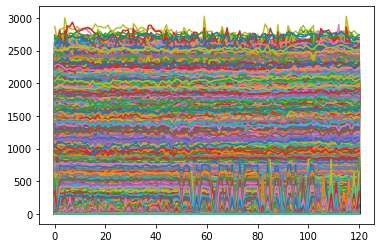

In [47]:
#Let's plot this!
import matplotlib.pyplot as plt
#create a linearly arranged list of 121 values. [1,2,3,4,5,6....,121]
x_axis = np.arange(121)
#We can also plot the entire image, but one slice is faster!
#y_axis = img_np[1,1,1,:]
y_axis = time_series
plt.plot(x_axis,y_axis)
plt.show()

can include another cell on saving the 2D file (generated above), and then maybe illustrate it? 

We can touch on functions, which are "blocks" of code that perform a specific task (or more than one tasks). Each functions can accept inputs, and use those inputs, and then generate outputs which can be returned and thus used elsewhere in the code. Let's quickly look at how the time series extraction can be structed into a function.
The __main__ function is the first function that is executed when you run a program. Therefore, when writing a code, it is good practice to include a __main__ function which houses important input variables function calls.

In [ ]:
import numpy as np
#The input for this function is img_reshape_arr
#let's first initialize an empty list that will hold the time series information.
time_series = []
def time_series_ext(img_reshape_arr):
#Essentially, we want a list that will contain the intensity value at every time point
#This should show how different "regions(spatial information)" changes with time.
    for i in range(img_reshape_arr.shape[1]):
    #For every time point, collect the value in the collapsed first dimension
    #The output time series list would be? ___ (121 points long)
        time_series.append(img_reshape_arr[:,i])
    return time_series 
    #return time_series #The function returns time_series to the entire block.
    #If we don't return it,accessing time_series outside this function block will
    #result in an error
    
time_series = time_series_ext(img_reshape_arr)